# Attica

In [54]:
from fem import *
from math import *
from heat import *
from FEMesh import readmsh
from scipy.integrate import solve_ivp

import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mesh

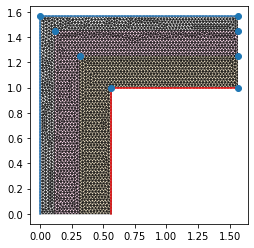

In [60]:
m = readmsh('gmsh/corner.msh')
nds = np.array([
    m.findNodeAt(0.000, 1.565),
    m.findNodeAt(0.115, 1.450),
    m.findNodeAt(0.315, 1.250),
    m.findNodeAt(0.565, 1.000),
    m.findNodeAt(1.565, 1.565),
    m.findNodeAt(1.565, 1.450),
    m.findNodeAt(1.565, 1.250),
    m.findNodeAt(1.565, 1.000)
])
m.plot()
plt.plot(m.nodes[0, nds], m.nodes[1, nds], 'o')

## Solution

### Define problem

In [41]:
# Masonry
m.groups.s1.p.keFunc = heatKe(1.0)
m.groups.s1.p.meFunc = heatMe(1800, 1000)

# Thermal insulation
m.groups.s2.p.keFunc = heatKe(0.04)
m.groups.s2.p.meFunc = heatMe(50, 900)

# Reinforced concrete
m.groups.s3.p.keFunc = heatKe(2.3)
m.groups.s3.p.meFunc = heatMe(2400, 1000)

# Outer surface
m.groups.wa.p.keFunc = robinKe(25)
m.groups.wa.p.reFunc = robinRe(25, -5)

# Inner surface
m.groups.wi.p.keFunc = robinKe(7.5)
m.groups.wi.p.reFunc = robinRe(7.5, 20)

### Stationary solution

In [42]:
K, M, r = assembleKMr(m)
thetaHat0 = np.linalg.solve(K, r)

#### Plot surface

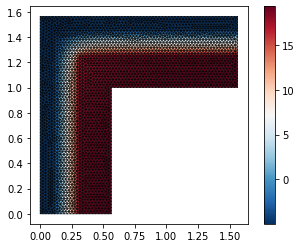

In [43]:
plotNodalSolution(m, thetaHat0)

#### Plot along outer and inner boundary

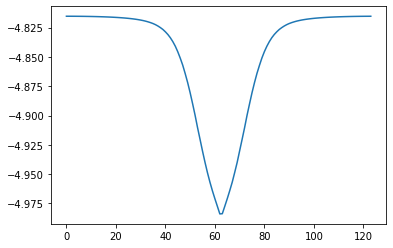

In [44]:
plt.plot(thetaHat0[m.groups.wa.nodeIDs[2:-1]]);

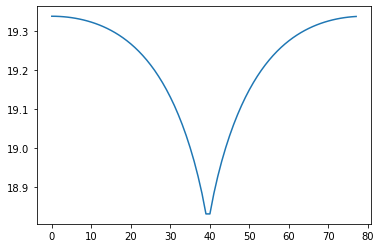

In [45]:
plt.plot(thetaHat0[m.groups.wi.nodeIDs[2:-1]]);

## Transient solution

TODO: Hier weitermachen